<a href="https://colab.research.google.com/github/b00kkk/US_President_Election_2024/blob/main/debate_visualization%26analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
debate1=pd.read_csv('2024-09-10-abc-trump-harris-debate.csv')

In [2]:
debate1.tail()

,speaker,text
206,KAMALA HARRIS,So I think you've heard tonight two very diffe...
207,LINSEY DAVIS,"Vice President Harris, thank you. President Tr..."
208,DONALD TRUMP,"So, she just started by saying she's going to ..."
209,LINSEY DAVIS,President Trump thank you. And that is our ABC...
210,DAVID MUIR,And I'm David Muir. Thank you for watching her...


In [3]:
debate_trump=debate1[debate1['speaker']=='DONALD TRUMP']

In [4]:
debate_harris=debate1[debate1['speaker']=='KAMALA HARRIS']

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.update(['well','okay','yeah','right','thing','president','get','know','say'])

In [7]:
from nltk.stem import WordNetLemmatizer

WL = WordNetLemmatizer()

def proper_lemmatize(word,tag):

    if tag[0]=='V':
        ret= WL.lemmatize(word,'v')
    elif tag[0]=='J':
        ret= WL.lemmatize(word,'a')
    elif tag[0]=='NNP':
        ret= word
    else:
        ret= WL.lemmatize(word)

    return ret if ret not in stopWords else ' '

In [8]:
Trump_speaking = debate_trump.text.values.tolist()
Harris_speaking = debate_harris.text.values.tolist()

In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

Trump_speaking_token = []

for sentence in Trump_speaking:
    clean_words=[]
    sentence = re.sub('[^a-zA-Z-]+',' ',sentence)

    for word in word_tokenize(sentence):
        if len(word)>2 and word.lower() not in stopWords:
            if word not in ['Trump','Harris']:
                word = word.lower()
            clean_words.append(word)

    Trump_speaking_token.append(clean_words)

for i in range(len(Trump_speaking_token)):
    Trump_speaking_token[i] = [proper_lemmatize(word,tag) for (word,tag) in pos_tag(Trump_speaking_token[i])]

Trump_corpus = [*map(lambda x: ' '.join(x) , Trump_speaking_token)]

Harris_speaking_token = []

for sentence in Harris_speaking:
    clean_words=[]
    sentence = re.sub('[^a-zA-Z-]+',' ',sentence)

    for word in word_tokenize(sentence):
        if len(word)>2 and word.lower() not in stopWords:
            if word not in ['Trump','Harris']:
                word = word.lower()
            clean_words.append(word)

    Harris_speaking_token.append(clean_words)

for i in range(len(Harris_speaking_token)):
    Harris_speaking_token[i] = [proper_lemmatize(word,tag) for (word,tag) in pos_tag(Harris_speaking_token[i])]

Harris_corpus = [*map(lambda x: ' '.join(x) , Harris_speaking_token)]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

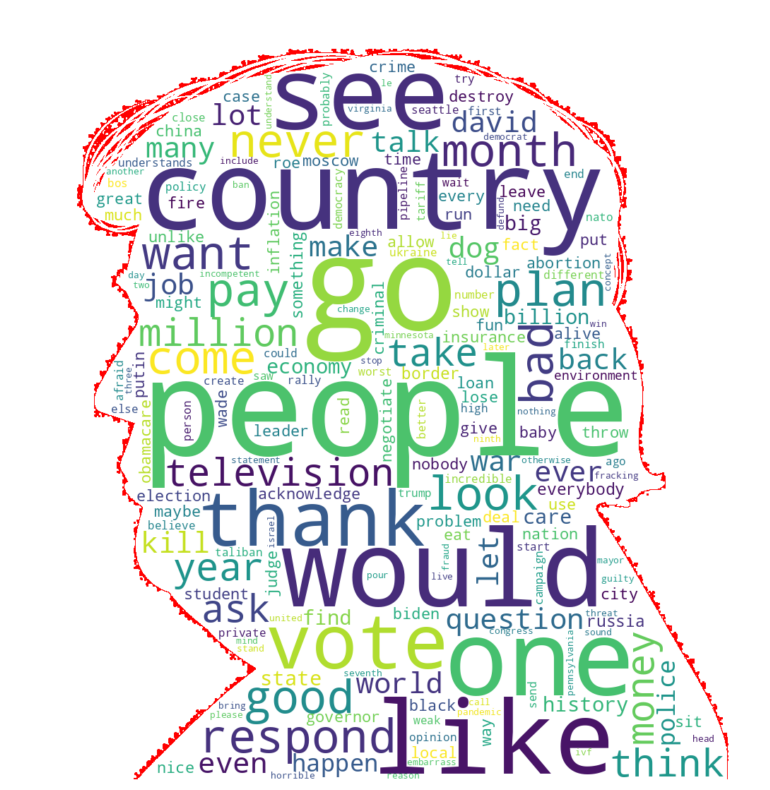

In [15]:
Trump_tfidfv = TfidfVectorizer(min_df=1).fit(Trump_corpus)
Trump_TFIDF_matrix = Trump_tfidfv.transform(Trump_corpus).toarray()

Trump_index_word = {idx:word for (word,idx) in Trump_tfidfv.vocabulary_.items()}

Trump_TFIDF_sum = Trump_TFIDF_matrix.sum(axis=0)

Trump_frequencies = {Trump_index_word[i]:Trump_TFIDF_sum[i] for i in range(len(Trump_tfidfv.vocabulary_))}

mask = Image.open("trump.jpg")
trump_mask = np.array(mask)

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      width = 800,
                      height = 400,
                      mask=trump_mask,
                      contour_width=1,
                      contour_color='red'
                     ).generate_from_frequencies(Trump_frequencies)



plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

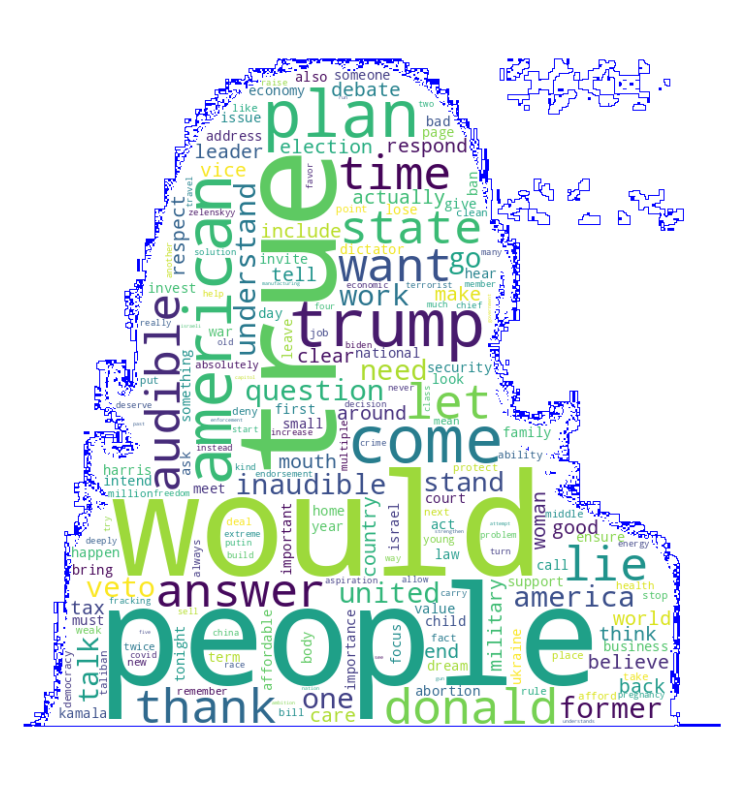

In [20]:
Harris_tfidfv = TfidfVectorizer(min_df=1).fit(Harris_corpus)
Harris_TFIDF_matrix = Harris_tfidfv.transform(Harris_corpus).toarray()

Harris_index_word = {idx:word for (word,idx) in Harris_tfidfv.vocabulary_.items()}

Harris_TFIDF_sum = Harris_TFIDF_matrix.sum(axis=0)

Harris_frequencies = {Harris_index_word[i]:Harris_TFIDF_sum[i] for i in range(len(Harris_tfidfv.vocabulary_))}

mask = Image.open("harris.png")
Harris_mask = np.array(mask)

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      width = 800,
                      height = 400,
                      mask=Harris_mask,
                      contour_width=1,
                      contour_color='blue'
                     ).generate_from_frequencies(Harris_frequencies)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()